In [87]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score, precision_recall_fscore_support
)
from scipy import stats
import numpy as np

In [88]:
model_test_results = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/skin_lesion_part_2_models/2022-06-24_11-37-26.394018/each_image_predictions.csv')
model_test_results

# need to make a new colum with image id, by splitting on '/' and then taking the id and strip off the .jpg




,Unnamed: 0,predicted,actual,image_path
0,0,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...


In [89]:
model_test_results["image_id"] = [None]*len(model_test_results)
for index, row in model_test_results.iterrows():
    image_path = row.image_path
    image_id = image_path.split("/")[-1].split(".")[0]
    model_test_results.loc[model_test_results["image_path"] == image_path, 'image'] = image_id

model_test_results

,Unnamed: 0,predicted,actual,image_path,image_id,image
0,0,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000004
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000159
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000160
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000167
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000173
...,...,...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073128
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073146
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073155
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073199


In [90]:
total_meta_data = pd.read_csv("/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv")

grouped_by_set = total_meta_data.groupby("rand_split")
test_metadata = grouped_by_set.get_group("test")

test_metadata


,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60
15,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60
31,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40
36,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40
...,...,...,...,...,...,...,...,...,...,...,...
25268,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60
25279,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60
25292,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60
25310,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60


In [91]:
age_na = test_metadata["age_approx"].isna().sum()
print("Number of na in age is ", age_na)

sex_na = test_metadata["sex"].isna().sum()
print("Number of na in sex is ", sex_na)

location_na = test_metadata["anatom_site_general"].isna().sum()
print("Number of na in location is ", location_na)

Number of na in age is  48
Number of na in sex is  42
Number of na in location is  276


In [92]:
# make new table of test metadata plus this test results 

test_results_metadata = pd.merge(test_metadata, model_test_results, on='image')
test_results_metadata = test_results_metadata.drop(columns="Unnamed: 0")
test_results_metadata

# len(test_results_metadata)

,image,age_approx,anatom_site_general,lesion_id,sex,image_path_x,rand_split,fitzpatrick,brisque,class,age_group,predicted,actual,image_path_y,image_id
0,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
1,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
3,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
4,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2530,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2531,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2532,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None


# Gender

In [93]:
from pandas.core.frame import DataFrame
# precision_recall_fscore_support where suport = None in our case as we are doing average 
gender_report = []
gender_bal_acc = []

genders = ["male", "female"]

for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    gender_bal_acc.append(bal_acc)

print(gender_bal_acc)


for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    gender_report.append(metric_report)

print(gender_report)

[0.7568540089486304, 0.7587267080745341]
[(0.6889388826396701, 0.7568540089486304, 0.7072561492924253, None), (0.6818572093835497, 0.7587267080745341, 0.7013118994826313, None)]


## Balanced Accuracy : Gender

Text(0, 0.5, 'Balanced Accuracy')

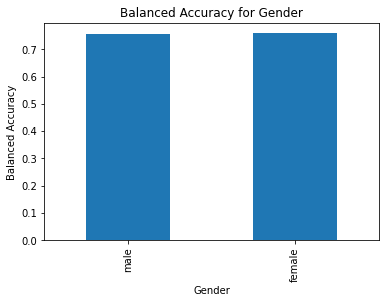

In [94]:
bal_acc_combo = list(zip(genders, gender_bal_acc))
df = pd.DataFrame(bal_acc_combo, columns = ['gender', 'balanced_accuracy'])

df.plot(
    x="gender", y="balanced_accuracy", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Gender")
plt.xlabel("Gender")
plt.ylabel("Balanced Accuracy")

## F1 score: Gender

Text(0, 0.5, 'F1 score')

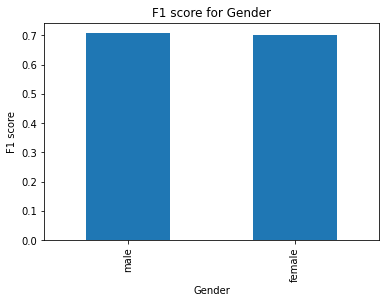

In [95]:
gender_f1 = []
for ind_list in gender_report:
    gender_f1.append(ind_list[2])

# type(genders)
f1_combo = list(zip(genders, gender_f1))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_f1'])

df.plot(
    x="gender", y="gender_f1", kind="bar", legend=False
)
plt.title("F1 score for Gender")
plt.xlabel("Gender")
plt.ylabel("F1 score")

## Precision: Gender

Text(0, 0.5, 'Precision')

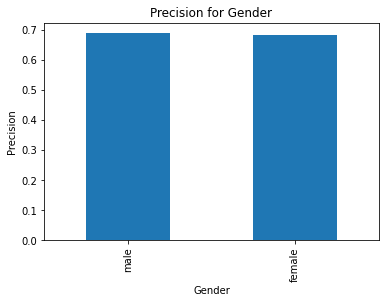

In [96]:
gender_precision = []
for ind_list in gender_report:
    gender_precision.append(ind_list[0])

# type(genders)
f1_combo = list(zip(genders, gender_precision))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_precision'])

df.plot(
    x="gender", y="gender_precision", kind="bar", legend=False
)
plt.title("Precision for Gender")
plt.xlabel("Gender")
plt.ylabel("Precision")

## Recall: Gender

Text(0, 0.5, 'Recall')

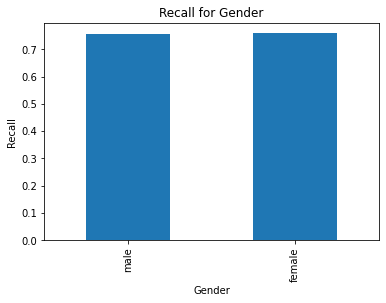

In [97]:
gender_recall = []
for ind_list in gender_report:
    gender_recall.append(ind_list[1])

# type(genders)
f1_combo = list(zip(genders, gender_recall))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_recall'])

df.plot(
    x="gender", y="gender_recall", kind="bar", legend=False
)
plt.title("Recall for Gender")
plt.xlabel("Gender")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Gender

In [98]:
# to test whether there is a relationship between number of the variable in the training set and the final metric score 

total_meta_data = pd.read_csv("/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv")

grouped_by_set = total_meta_data.groupby("rand_split")
train_metadata = grouped_by_set.get_group("train")

train_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NON_MEL,41-60
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NON_MEL,21-40
5,ISIC_0000006,25.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,5.0,35.817566,NON_MEL,21-40
7,ISIC_0000008,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.250671,NON_MEL,21-40
8,ISIC_0000009,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,39.956726,NON_MEL,21-40
...,...,...,...,...,...,...,...,...,...,...,...
25324,ISIC_0073245,45.0,upper extremity,BCN_0003359,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,19.272644,NON_MEL,41-60
25325,ISIC_0073246,80.0,anterior torso,BCN_0005265,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,4.0,30.052917,NON_MEL,>60
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.043640,NON_MEL,>60
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,37.097351,NON_MEL,>60


In [99]:
sex_count = list(train_metadata["sex"].value_counts())
sex_count

gender_bal_acc_correl = stats.spearmanr(sex_count, gender_bal_acc)
print("The SRCC for balanced accuracy vs gender count is ", gender_bal_acc_correl)
print("gender bal acc", gender_bal_acc)

gender_f1_correl = stats.spearmanr(sex_count, gender_f1)
print("The SRCC for f1 score vs gender count is ", gender_f1_correl)
print("gender f1", gender_f1)

gender_precision_correl = stats.spearmanr(sex_count, gender_precision)
print("The SRCC for precision vs gender count is ", gender_precision_correl)
print("gender precision ", gender_precision)

gender_recall_correl = stats.spearmanr(sex_count, gender_recall)
print("The SRCC for recall vs gender count is ", gender_recall_correl)
print("gender recall ", gender_recall)

gender_srcc = [gender_bal_acc_correl, gender_f1_correl, gender_precision_correl, gender_recall_correl]
gender_array = np.array(gender_srcc)
gender_table = DataFrame(gender_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
gender_table

# lets come back to this as the p-value maybe NAN as there is only two varaiables and may need a different metric...https://stackoverflow.com/questions/59002624/why-i-get-nan-in-spearman-correlation-in-python
# this partially may suggest that there is too little variance in the values so to do with the maths behind SRCC it doesnt really work


The SRCC for balanced accuracy vs gender count is  SpearmanrResult(correlation=-0.9999999999999999, pvalue=nan)
gender bal acc [0.7568540089486304, 0.7587267080745341]
The SRCC for f1 score vs gender count is  SpearmanrResult(correlation=0.9999999999999999, pvalue=nan)
gender f1 [0.7072561492924253, 0.7013118994826313]
The SRCC for precision vs gender count is  SpearmanrResult(correlation=0.9999999999999999, pvalue=nan)
gender precision  [0.6889388826396701, 0.6818572093835497]
The SRCC for recall vs gender count is  SpearmanrResult(correlation=-0.9999999999999999, pvalue=nan)
gender recall  [0.7568540089486304, 0.7587267080745341]


,SRCC,p-value
BA,-1.0,NaN
F1,1.0,NaN
P,1.0,NaN
R,-1.0,NaN


# Skin Tone

In [100]:
skin_tone_report = []
skin_tone_bal_acc = []

skin_tones = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    skin_tone_bal_acc.append(bal_acc)

print(skin_tone_bal_acc)


for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    skin_tone_report.append(metric_report)

print(skin_tone_report)

[0.762440288580621, 0.7331879316612141, 0.6782805429864254, 0.7051282051282051, 0.6041666666666666, 0.7485915492957746]
[(0.6940323453856412, 0.762440288580621, 0.7116569735666713, None), (0.6633562515915457, 0.7331879316612141, 0.6847407407407408, None), (0.5965686274509804, 0.6782805429864254, 0.5978112175102599, None), (0.5666666666666667, 0.7051282051282051, 0.553623188405797, None), (0.6041666666666666, 0.6041666666666666, 0.6041666666666666, None), (0.6697115384615384, 0.7485915492957746, 0.6945701357466063, None)]


## Balanced Accuracy: Skin Tone

Text(0, 0.5, 'Balanced Accuracy')

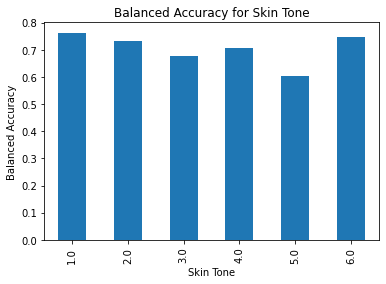

In [101]:
skin_tone_chart = list(zip(skin_tones, skin_tone_bal_acc))
df = pd.DataFrame(skin_tone_chart, columns = ['skin_tones', 'skin_tone_bal_acc'])

df.plot(
    x="skin_tones", y="skin_tone_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Balanced Accuracy")

## F1 score: Skin Tone

Text(0, 0.5, 'F1 score')

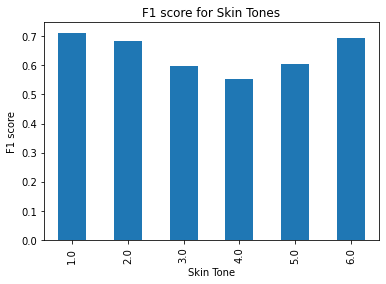

In [102]:
skin_tone_f1 = []
for ind_list in skin_tone_report:
    skin_tone_f1.append(ind_list[2])


f1_skin_combo = list(zip(skin_tones, skin_tone_f1))

df = pd.DataFrame(f1_skin_combo, columns = ['skin_tones', 'skin_tone_f1'])

df.plot(
    x="skin_tones", y="skin_tone_f1", kind="bar", legend=False
)
plt.title("F1 score for Skin Tones")
plt.xlabel("Skin Tone")
plt.ylabel("F1 score")

## Precision: Skin Tone

Text(0, 0.5, 'Precision')

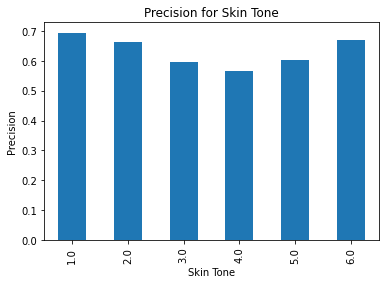

In [103]:
skin_tone_precision = []
for ind_list in skin_tone_report:
    skin_tone_precision.append(ind_list[0])

# type(genders)
precision_tone_combo = list(zip(skin_tones, skin_tone_precision))

df = pd.DataFrame(precision_tone_combo, columns = ['skin_tones', 'skin_tone_precision'])

df.plot(
    x="skin_tones", y="skin_tone_precision", kind="bar", legend=False
)
plt.title("Precision for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Precision")

## Recall: Skin Tone

Text(0, 0.5, 'Recall')

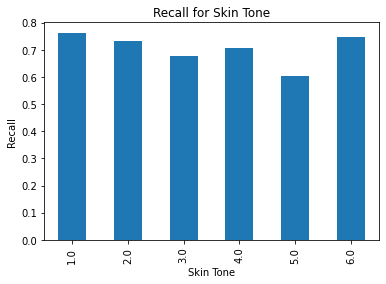

In [104]:
skin_tone_recall = []
for ind_list in skin_tone_report:
    skin_tone_recall.append(ind_list[1])

# type(skin_tones)
recall_skin_tone_combo = list(zip(skin_tones, skin_tone_recall))

df = pd.DataFrame(recall_skin_tone_combo, columns = ['skin_tones', 'skin_tone_recall'])

df.plot(
    x="skin_tones", y="skin_tone_recall", kind="bar", legend=False
)
plt.title("Recall for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Skin Tone

In [105]:
tone_count = train_metadata["fitzpatrick"].value_counts()
tone_count = list(tone_count.sort_index().values)

bal_acc_correl = stats.spearmanr(tone_count, skin_tone_bal_acc)
print("The SRCC for balanced accuracy vs skin tone count is ", bal_acc_correl)

f1_correl = stats.spearmanr(tone_count, skin_tone_f1)
print("The SRCC for f1 score vs skin tone count is ", f1_correl)

precision_correl = stats.spearmanr(tone_count, skin_tone_precision)
print("The SRCC for precision vs skin tone count is ", precision_correl)

recall_correl = stats.spearmanr(tone_count, skin_tone_recall)
print("The SRCC for recall vs skin tone count is ", recall_correl)

tone_srcc = [bal_acc_correl, f1_correl, precision_correl, recall_correl]
tone_array = np.array(tone_srcc)
tone_table = DataFrame(tone_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
tone_table

The SRCC for balanced accuracy vs skin tone count is  SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
The SRCC for f1 score vs skin tone count is  SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
The SRCC for precision vs skin tone count is  SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
The SRCC for recall vs skin tone count is  SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)


,SRCC,p-value
BA,0.942857,0.004805
F1,0.828571,0.041563
P,0.828571,0.041563
R,0.942857,0.004805


# Age 

In [108]:
test_results_metadata["age_group"].unique()


# ages = sorted(test_results_metadata["age_group"].unique())
# print(ages)
# age_report = []
# age_bal_acc = []

# for age in ages:
#     df = (test_results_metadata.loc[test_results_metadata["age_group"] == age])
#     bal_acc = balanced_accuracy_score(df['actual'], df['predicted'])
#     age_bal_acc.append(bal_acc)

# print(age_bal_acc)


# for age in ages:
#     df = (test_results_metadata.loc[test_results_metadata["age_group"] == age])
#     metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
#     age_report.append(metric_report)


# print(age_report)

array(['21-40', '>60', '41-60', nan, '0-20'], dtype=object)

## Balanced Accurary: Age



In [ ]:
age_chart = list(zip(ages, age_bal_acc))
df = pd.DataFrame(age_chart, columns = ['ages', 'age_bal_acc'])

df.plot(
    x="ages", y="age_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Age")
plt.xlabel("Ages")
plt.ylabel("Balanced Accuracy")

## F1 score: Age

In [ ]:
age_f1 = []
for ind_list in age_report:
    age_f1.append(ind_list[2])

# type(genders)
f1_age_combo = list(zip(ages, age_f1))

df = pd.DataFrame(f1_age_combo, columns = ['ages', 'age_f1'])

df.plot(
    x="ages", y="age_f1", kind="bar", legend=False
)
plt.title("F1 score for Age")
plt.xlabel("Age")
plt.ylabel("F1 score")

## Precision: Age

In [ ]:
age_precision = []
for ind_list in age_report:
    age_precision.append(ind_list[0])

# type(age)
precision_age_combo = list(zip(ages, age_precision))

df = pd.DataFrame(precision_age_combo, columns = ['ages', 'age_precision'])

df.plot(
    x="ages", y="age_precision", kind="bar", legend=False
)
plt.title("Precision for Age")
plt.xlabel("Age")
plt.ylabel("Precision")

## Recall: Age

In [ ]:
age_recall = []
for ind_list in age_report:
    age_recall.append(ind_list[1])

# type(skin_tones)
recall_age_combo = list(zip(ages, age_recall))

df = pd.DataFrame(recall_age_combo, columns = ['ages', 'age_recall'])

df.plot(
    x="ages", y="age_recall", kind="bar", legend=False
)
plt.title("Recall for Age")
plt.xlabel("Age")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Age

In [ ]:
age_count = train_metadata["age_group"].value_counts()
age_count = list(age_count.sort_index().values)

age_bal_acc = [x for x in age_bal_acc if str(x) != 'nan']
age_f1 = [x for x in age_f1 if str(x) != 'nan']
age_precision = [x for x in age_precision if str(x) != 'nan']
age_recall = [x for x in age_recall if str(x) != 'nan']


age_bal_acc_correl = stats.spearmanr(age_count, age_bal_acc)
print("The SRCC for balanced accuracy vs age count is ", age_bal_acc_correl)

age_f1_correl = stats.spearmanr(age_count, age_f1)
print("The SRCC for f1 score vs age count is ", age_f1_correl)

age_precision_correl = stats.spearmanr(age_count, age_precision)
print("The SRCC for precision vs age count is ", age_precision_correl)

age_recall_correl = stats.spearmanr(age_count, age_recall)
print("The SRCC for recall vs age count is ", age_recall_correl)

age_srcc = [age_bal_acc_correl, age_f1_correl, age_precision_correl, age_recall_correl]
age_array = np.array(age_srcc)
age_table = DataFrame(age_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
age_table

# Anatomical Skin Leison Location

In [ ]:
locations = list(test_results_metadata["anatom_site_general"].unique())

# print(locations)
location_report = []
location_bal_acc = []

for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    location_bal_acc.append(bal_acc)

# print(location_bal_acc)
location_bal_acc = pd.Series(data=location_bal_acc, index=locations).sort_index()
location_bal_acc = location_bal_acc.drop(labels=np.nan)

for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    location_report.append(metric_report)

# print(location_report)

location_report = pd.Series(data=location_report, index=locations).sort_index()
location_report = location_report.drop(labels=np.nan)



## Balanced Accuracy: Skin Leison Location

In [ ]:
location_chart = list(zip(locations, location_bal_acc))
df = pd.DataFrame(location_chart, columns = ['locations', 'location_bal_acc'])

df.plot(
    x="locations", y="location_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Balanced Accuracy")

## F1 score: Skin Leison Location

In [ ]:
location_f1 = []
for ind_list in location_report:
    location_f1.append(ind_list[2])

f1_location_combo = list(zip(locations, location_f1))

df = pd.DataFrame(f1_location_combo, columns = ['locations', 'location_f1'])

df.plot(
    x="locations", y="location_f1", kind="bar", legend=False
)
plt.title("F1 score for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("F1 score")

## Precision: Skin Lesion Location

In [ ]:
location_precision = []
for ind_list in location_report:
    location_precision.append(ind_list[0])

# type(age)
precision_location_combo = list(zip(locations, location_precision))

df = pd.DataFrame(precision_location_combo, columns = ['locations', 'location_precision'])

df.plot(
    x="locations", y="location_precision", kind="bar", legend=False
)
plt.title("Precision for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Precision")

## Recall: Skin Lesion Location

In [ ]:
location_recall = []
for ind_list in location_report:
    location_recall.append(ind_list[1])

# type(skin_tones)
recall_location_combo = list(zip(locations, location_recall))

df = pd.DataFrame(recall_location_combo, columns = ['locations', 'location_recall'])

df.plot(
    x="locations", y="location_recall", kind="bar", legend=False
)
plt.title("Recall for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Skin Lesion Location

In [ ]:
location_count = train_metadata["anatom_site_general"].value_counts()
location_count = location_count.sort_index()

location_report_matrix = np.array([np.array(x) for x in location_report.values])
location_report_table = DataFrame(location_report_matrix, index=location_report.index, columns=["precision", "recall", "fscore", "support"])

location_bal_acc_correl = stats.spearmanr(location_count, location_bal_acc)
print("The SRCC for balanced accuracy vs location count is ", location_bal_acc_correl)

location_f1_correl = stats.spearmanr(location_count, location_report_table["fscore"])
print("The SRCC for f1 score vs location count is ", location_f1_correl)

location_precision_correl = stats.spearmanr(location_count, location_report_table["precision"])
print("The SRCC for precision vs location count is ", location_precision_correl)

location_recall_correl = stats.spearmanr(location_count, location_report_table["recall"])
print("The SRCC for recall vs location count is ", location_recall_correl)

location_srcc = [location_bal_acc_correl, location_f1_correl, location_precision_correl, location_recall_correl]
location_array = np.array(location_srcc)
location_table = DataFrame(location_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
location_table

In [ ]:
location_report_matrix